<a href="https://colab.research.google.com/github/cristobalperezp/Intro_Deep_Learning/blob/main/Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> Tarea 1 - Introducción al Deep Learning
<h2 align="center">  Integrantes: 
<h3 align="center"> IN6534-1 - Introducción al Deep Learning
<h3 align="center"> Primavera 2022

---

# Lectura de Datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!git clone 'https://github.com/cristobalperezp/Intro_Deep_Learning.git'

Cloning into 'Intro_Deep_Learning'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [3]:
df = pd.read_excel('/content/Intro_Deep_Learning/T1_credito.xlsx')

# Análisis Exploratorio de Datos

In [4]:
df.head()

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj
0,100001,4.0,2.0,9561.984843,7660.036317,40.0,64117.447797,44473.097916,N,SupInc,S
1,100002,28.0,25.0,11985.886924,6872.030508,49.0,124062.085998,84958.101814,N,Med,N
2,100003,2.0,3.0,1028.356328,1075.598877,38.0,32010.884862,27638.818281,N,SupCom,N
3,100004,11.0,14.0,10974.303210,2377.430575,43.0,172337.436327,125056.572446,N,Bas,N
4,100005,3.0,1.0,842.807194,1142.827425,33.0,25937.760762,23755.321327,N,SupInc,S


In [5]:
df.shape

(3000, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            3000 non-null   int64  
 1   AgnosDirec    2999 non-null   float64
 2   AgnosEmpleo   2998 non-null   float64
 3   DeudaExt      2999 non-null   float64
 4   DeudaInt      2996 non-null   float64
 5   Edad          2998 non-null   float64
 6   Ingreso       2998 non-null   float64
 7   Ingreso2      3000 non-null   float64
 8   Nacionalidad  3000 non-null   object 
 9   NivelEdu      3000 non-null   object 
 10  VarObj        3000 non-null   object 
dtypes: float64(7), int64(1), object(3)
memory usage: 257.9+ KB


In [34]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
ID,3000.0,101500.500,866.170,100001.000,100750.750,101500.500,102250.250,103000.000
AgnosDirec,2999.0,7.088,6.962,0.000,2.000,5.000,10.000,61.000
AgnosEmpleo,2998.0,7.147,6.653,0.000,2.000,5.000,10.000,47.000
DeudaExt,2999.0,4531.013,7084.775,21.551,1110.243,2278.662,5093.769,123939.236
DeudaInt,2996.0,2275.677,5409.792,8.304,416.039,958.279,2318.271,190648.853
Edad,2998.0,37.660,36.634,18.000,29.000,36.500,44.000,1970.000
Ingreso,2998.0,62567.743,49385.681,-13123.602,30282.678,49516.129,78851.470,536488.400
Ingreso2,3000.0,52152.667,42246.043,-9723.719,25109.557,40632.271,66206.198,513618.589


In [8]:
df.dtypes

ID                int64
AgnosDirec      float64
AgnosEmpleo     float64
DeudaExt        float64
DeudaInt        float64
Edad            float64
Ingreso         float64
Ingreso2        float64
Nacionalidad     object
NivelEdu         object
VarObj           object
dtype: object

In [9]:
df.duplicated().sum()

0

In [37]:
df.nunique()

ID              3000
AgnosDirec        45
AgnosEmpleo       41
DeudaExt        2999
DeudaInt        2996
Edad              54
Ingreso         2998
Ingreso2        2999
Nacionalidad       1
NivelEdu           5
VarObj             2
dtype: int64

In [10]:
df.isnull().sum()

ID              0
AgnosDirec      1
AgnosEmpleo     2
DeudaExt        1
DeudaInt        4
Edad            2
Ingreso         2
Ingreso2        0
Nacionalidad    0
NivelEdu        0
VarObj          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

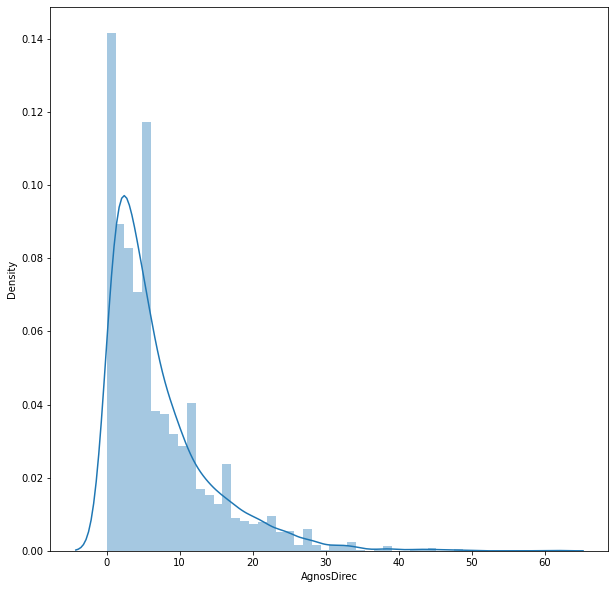

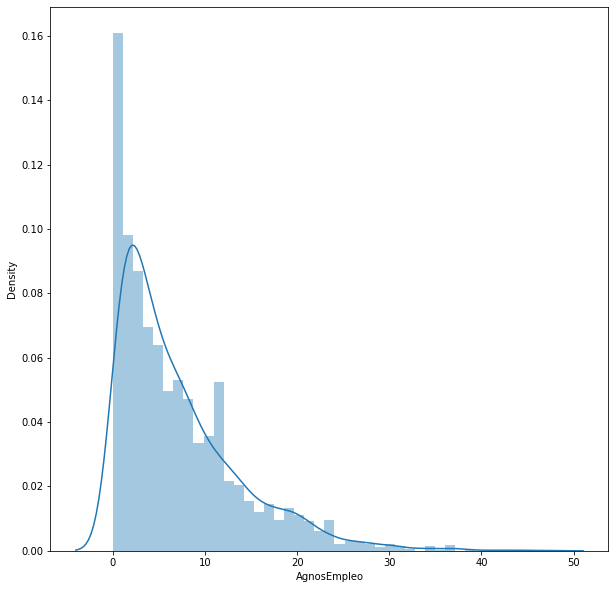

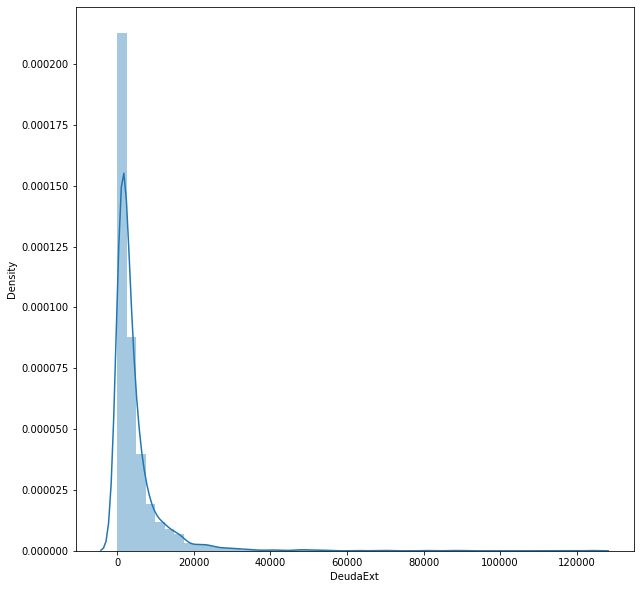

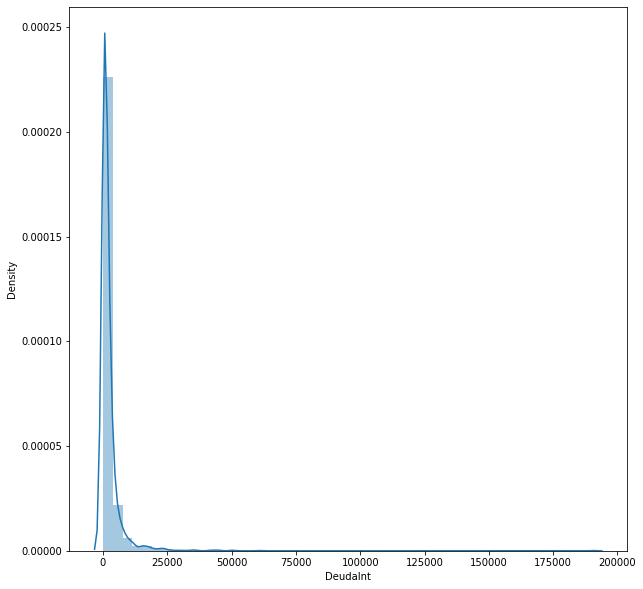

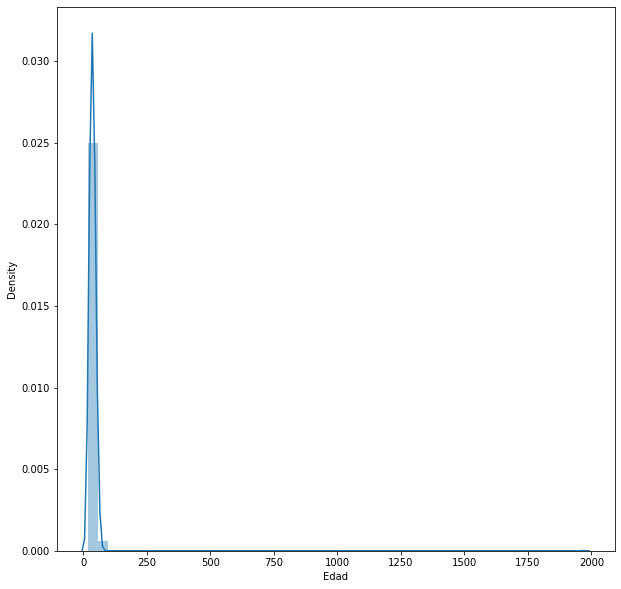

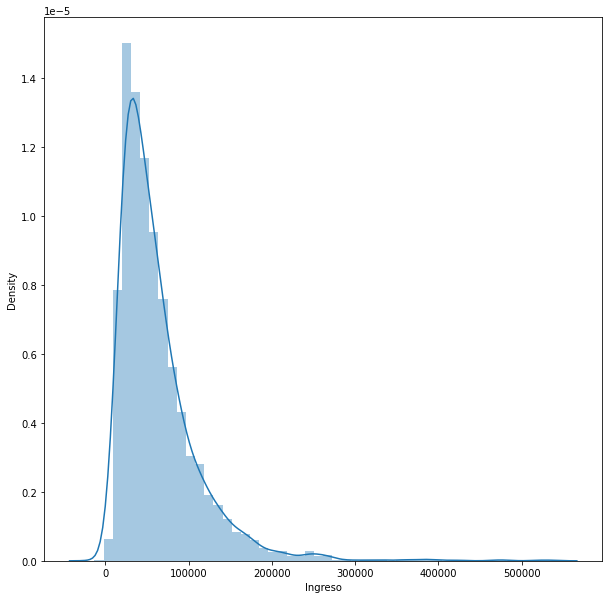

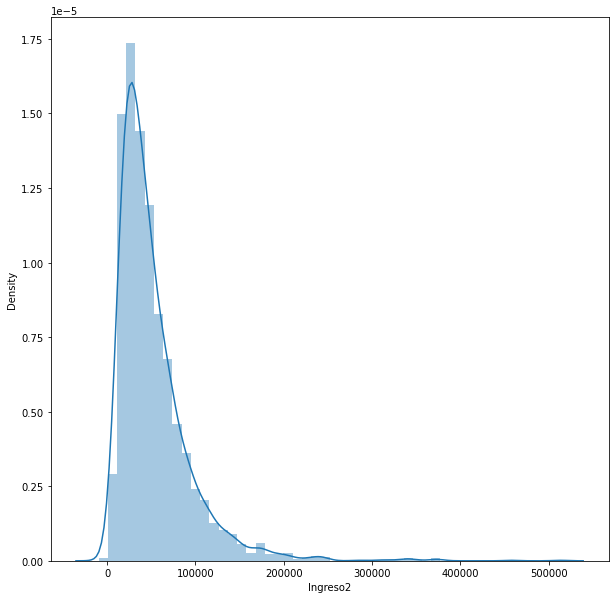

In [41]:
var_numeric = list(df.describe().columns)[1:]
for n in var_numeric:
  plt.figure(figsize=(10,10))
  sns.distplot(df[n])

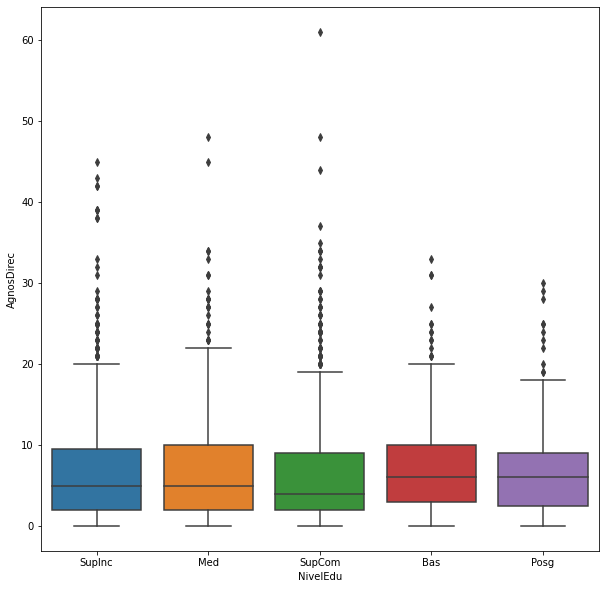

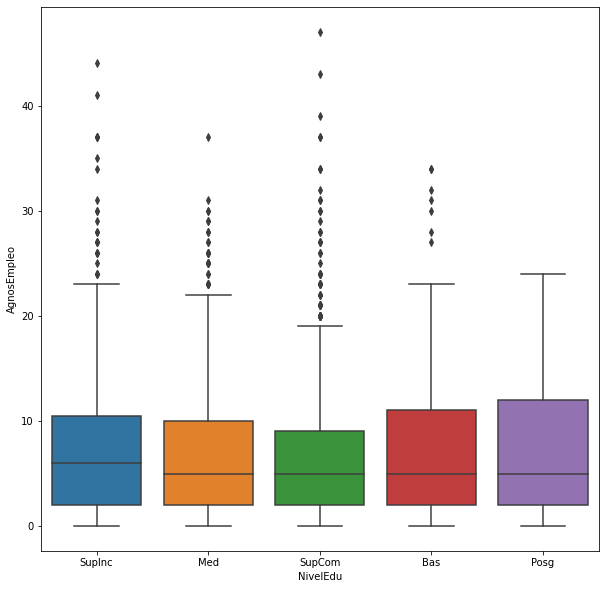

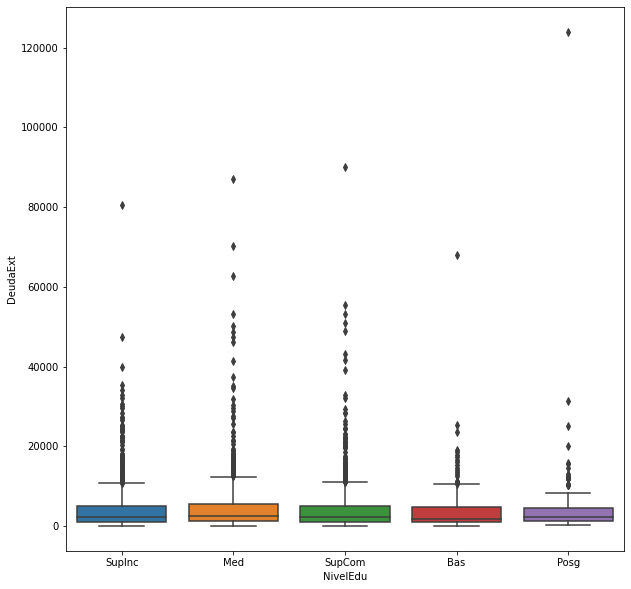

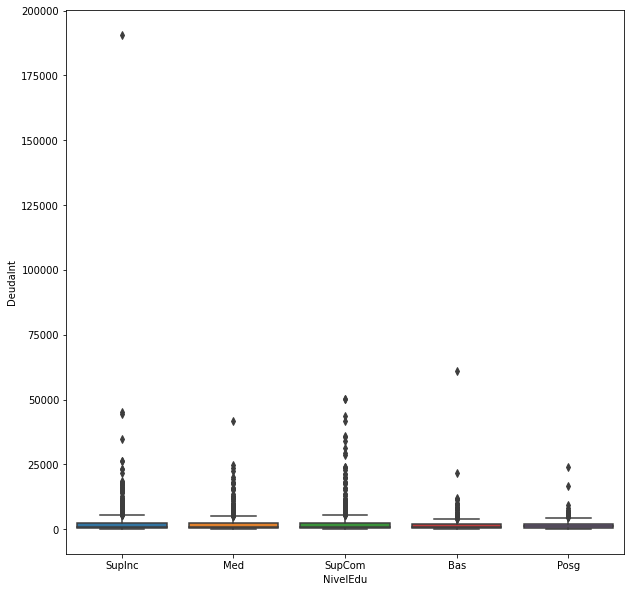

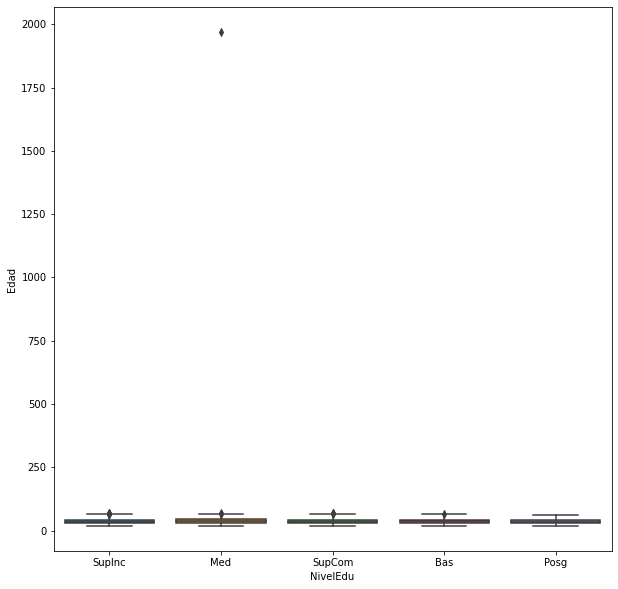

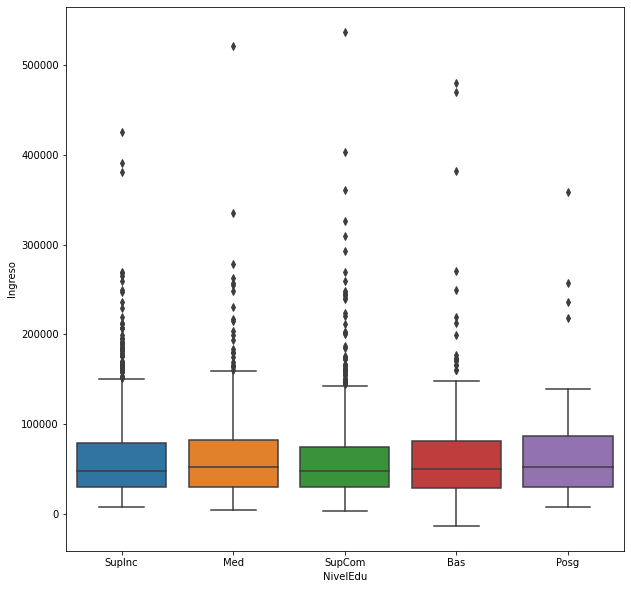

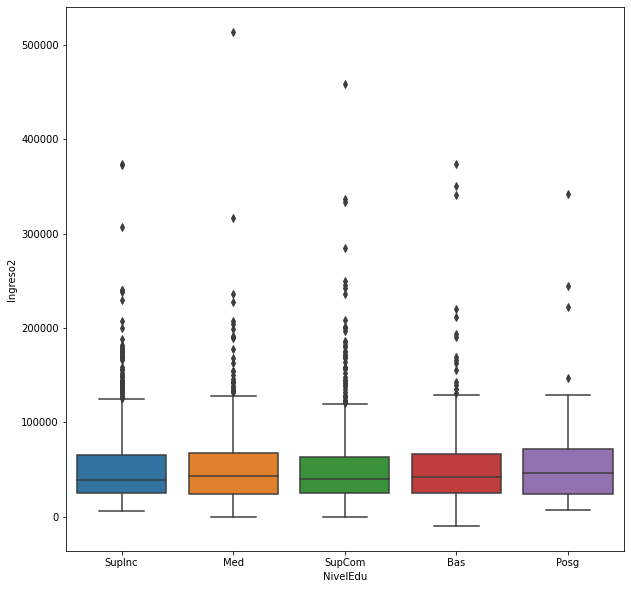

In [40]:
for i in var_numeric:
    plt.figure(figsize=(10,10))
    sns.boxplot(data = df, x = 'NivelEdu', y=i)

In [66]:
ed = list(df['NivelEdu'].unique())
for i in ed:
  mask = (df['NivelEdu']== i) & (df['VarObj']=='S')
  mask2 = (df['NivelEdu']== i)
  n = df[mask2].shape[0]
  ap = df[mask]['VarObj'].count()/n
  print('Para el nivel educacional',i,round(ap*100,3),'% son aprobados')
  print()

Para el nivel educacional SupInc 20.993 % son aprobados

Para el nivel educacional Med 19.304 % son aprobados

Para el nivel educacional SupCom 25.536 % son aprobados

Para el nivel educacional Bas 10.7 % son aprobados

Para el nivel educacional Posg 20.112 % son aprobados



## Pre-procesamiento

## Transformaciones

# Entrenamiento de la Red Neuronal

# Evaluación